In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_point = np.array([
  [1,2],
  [3,3],
  [2,2],
  [8,8],
  [6,6],
  [7,7],
  [-3,-3],
  [-2,-4],
  [-7,-7],
])

In [3]:
x = data_point[:,0]
y = data_point[:,1]

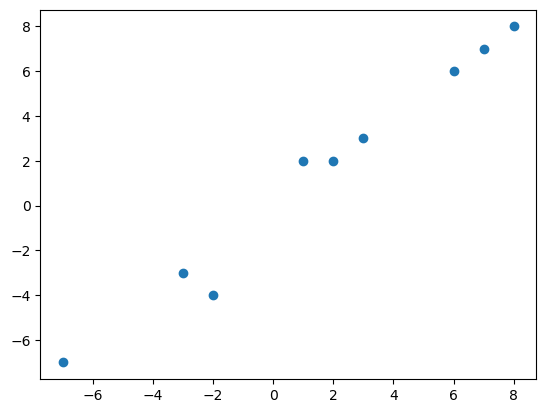

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
class KNN:
  def __init__(self,clusters,data_points) -> None:
    self.clusters = clusters
    self.data_points = data_points
    self.plot_colors = ['r', 'g', 'b', 'y', 'c', 'm']

  def __plot(self,data, set_cluster, clusters, colors,title="KNN"):
    labels = [f"Cluster {i+1}" for i in range(len(colors))]
    data_x = data[:, 0]
    data_y = data[:, 1]
        
    for i in range(len(data)):
        plt.scatter(data_x[i], data_y[i], marker="o", color=colors[set_cluster[i]], s=50)
    
    for k in range(len(clusters)):
        kx = clusters[k][0]
        ky = clusters[k][1]
        plt.scatter(kx, ky, marker="*", color=colors[k], s=200, label = labels[k])
    plt.legend()
    plt.title(title)
    plt.show()

  def __euclidian_distance(self,p1,p2):
    return np.sqrt(np.sum(np.square((p1-p2)),axis=1))
  
  def assign(self):
    cluster_distance = []
    for centroid in self.clusters:
      dist = self.__euclidian_distance(centroid,self.data_points)
      cluster_distance.append(dist)
    set_cluster = np.argmin(cluster_distance,axis=0)
    return set_cluster
  
  def update(self,set_cluster):
    new_clusters = []
    for i in range(len(self.clusters)):
      new_clusters.append(np.mean(self.data_points[set_cluster==i],axis=0))
    self.clusters = new_clusters
    return self.clusters

  def cost(self):
    set_cluster = self.assign()
    cost = 0
    for i in range(len(self.clusters)):
      x  = np.squeeze(self.data_points[np.argwhere(set_cluster==i)])
      dist = np.sqrt(np.sum(np.square((x-self.clusters[i]))))
      cost += dist
    return cost

  def plot(self):
    self.__plot(self.data_points,self.assign(),self.clusters,np.random.rand(len(self.clusters),3),"KNN")
  
  def run(self):
    old_cost = float('inf')
    for i in range(1,100):
      set_cluster = self.assign()
      self.__plot(self.data_points,set_cluster,self.clusters,np.random.rand(len(self.clusters),3),f"Assigning clusters at iteration {i}")
      self.update(set_cluster)
      self.__plot(self.data_points,set_cluster,self.clusters,np.random.rand(len(self.clusters),3),f"Updating clusters at iteration {i}")
      print("Cost function =",self.cost())
      if old_cost == self.cost():
        print(f"Converged with {i} iterations")
        break
      old_cost = self.cost()

In [6]:
clusters = np.array([[3,3],[2,2],[-3,-3]])
knn = KNN(clusters,data_point)

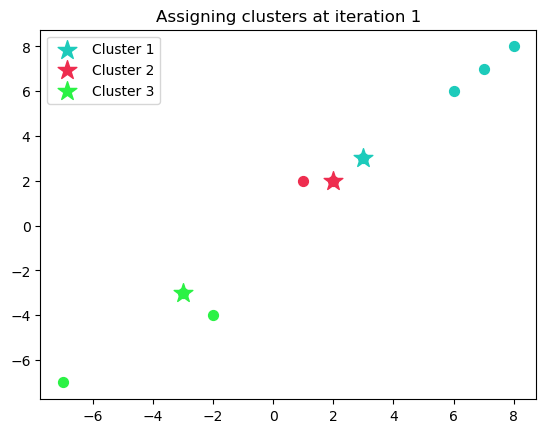

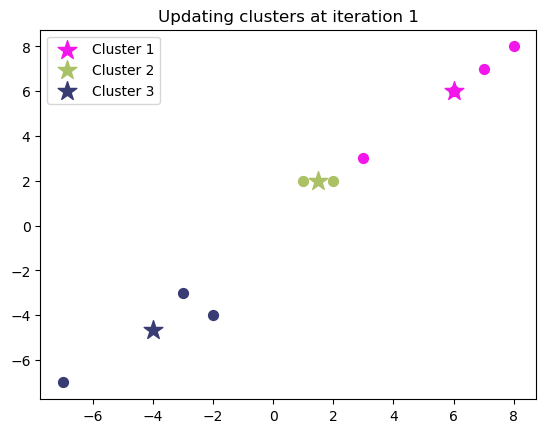

Cost function = 9.85972161896732


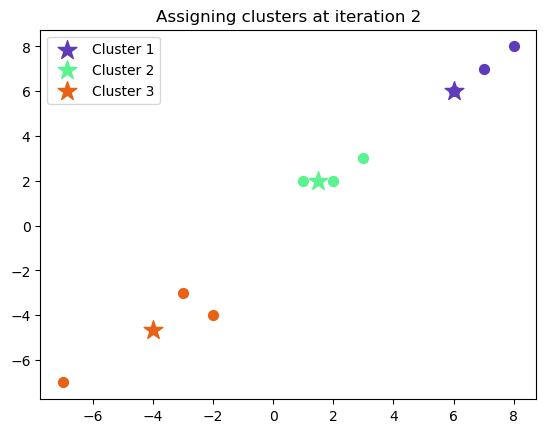

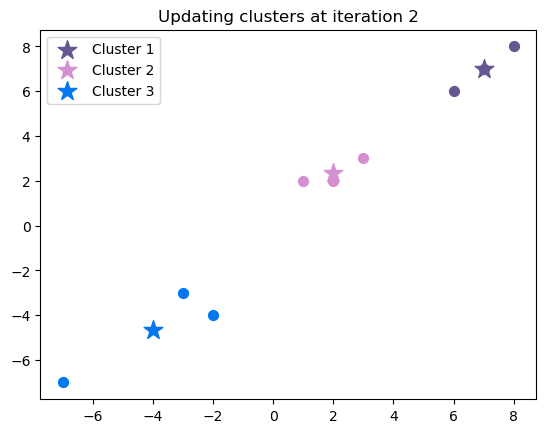

Cost function = 8.393945447550685


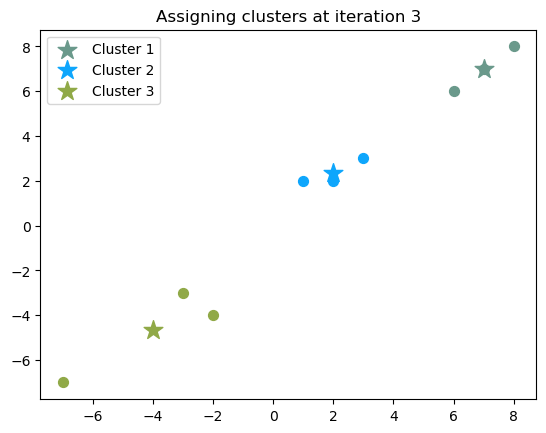

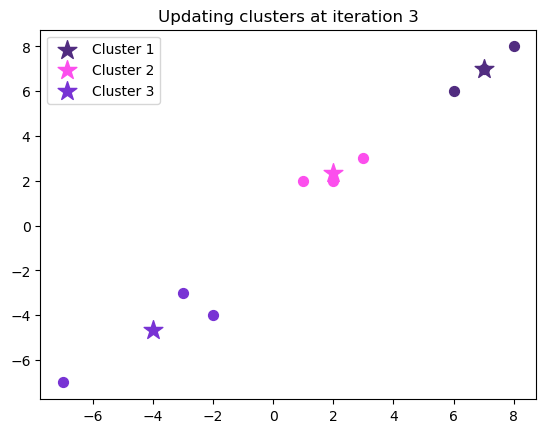

Cost function = 8.393945447550685
Converged with 3 iterations


In [7]:
knn.run()

In [8]:
# T5: Updated centroids
[tuple(centroid) for centroid in knn.clusters]

[(7.0, 7.0), (2.0, 2.3333333333333335), (-4.0, -4.666666666666667)]

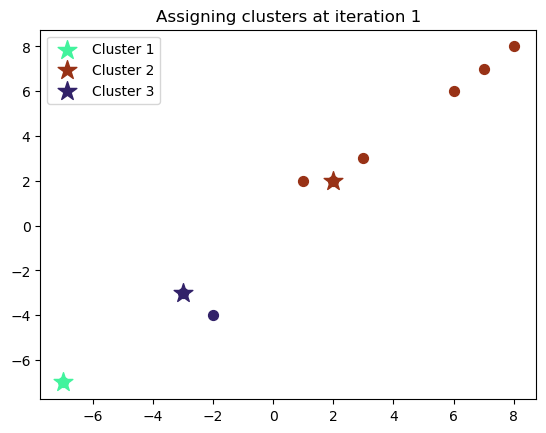

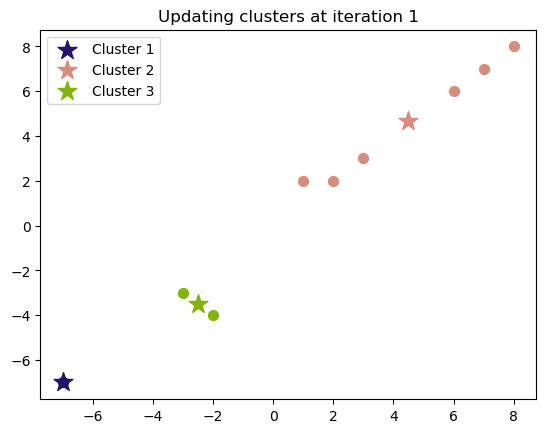

Cost function = 9.765462528203138


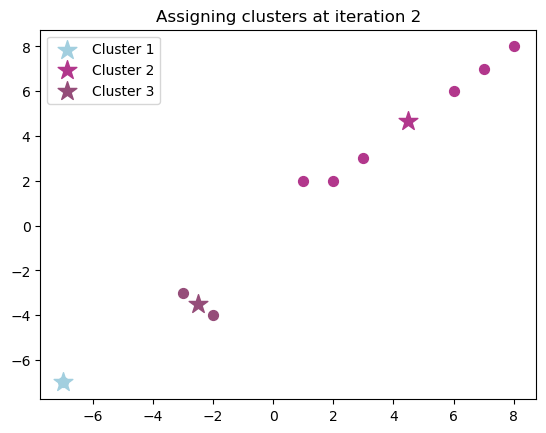

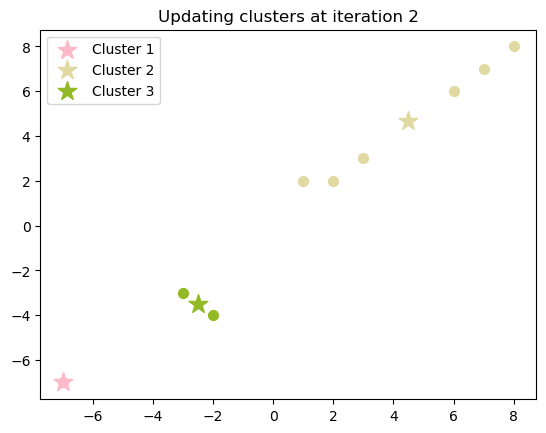

Cost function = 9.765462528203138
Converged with 2 iterations


In [9]:
clusters = np.array([[-7,-7],[2,2],[-3,-3]])
knn2 = KNN(clusters,data_point)
knn2.run()

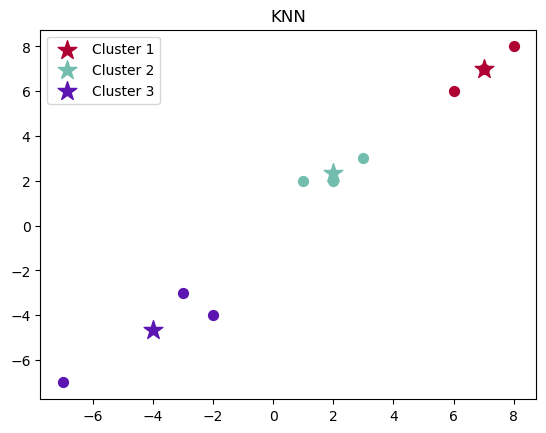

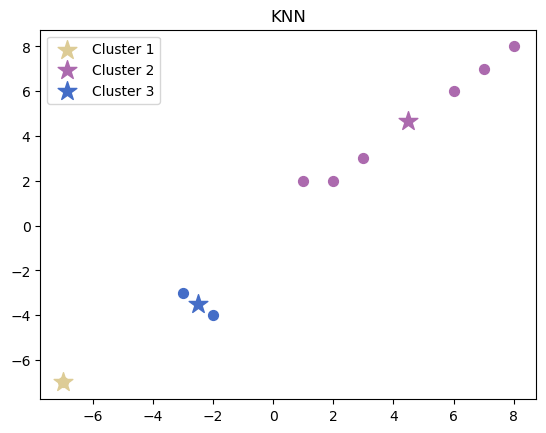

Old centroids (T5) : [(7.0, 7.0), (2.0, 2.3333333333333335), (-4.0, -4.666666666666667)]
New centroids : [(-7.0, -7.0), (4.5, 4.666666666666667), (-2.5, -3.5)]


In [10]:
# T6: Changed Centroids
knn.plot()
knn2.plot()
print("Old centroids (T5) :",[tuple(centroid) for centroid in knn.clusters])
print("New centroids :",[tuple(centroid) for centroid in knn2.clusters])

# Explaination : 
### The algorithm is not converging to the same centroids because the initial centroids are different. 
### That means initial centroids can affect the final result of the algorithm.

In [11]:
# T6: Changed Centroids
print("Old centroids (T5) :",[tuple(centroid) for centroid in knn.clusters])
print("New centroids :",[tuple(centroid) for centroid in knn2.clusters])

# Explaination : 
### The algorithm is not converging to the same centroids because the initial centroids are different. 
### That means initial centroids can affect the final result of the algorithm.

Old centroids (T5) : [(7.0, 7.0), (2.0, 2.3333333333333335), (-4.0, -4.666666666666667)]
New centroids : [(-7.0, -7.0), (4.5, 4.666666666666667), (-2.5, -3.5)]


In [12]:
#T7: Which is better?
knn.cost(),knn2.cost()

# Explaination :
### The cost function of the first algorithm is better because it is lower than the second one.
### That means the first algorithm is better than the second one.

(8.393945447550685, 9.765462528203138)